<a href="https://colab.research.google.com/github/oskarsah/107-2Multimedia/blob/master/Keras_Mnist_MLP_h256.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [3]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(units=256,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

W0615 00:07:32.313458 140489331623808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0615 00:07:32.369672 140489331623808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0615 00:07:32.386476 140489331623808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



In [4]:
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
model.compile(loss='categorical_crossentropy',
optimizer='adam', metrics=['accuracy'])

train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2,
                         epochs=10, batch_size=200,verbose=2)

W0615 00:07:47.250252 140489331623808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0615 00:07:47.396175 140489331623808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0615 00:07:47.860634 140489331623808 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0615 00:07:48.057499 140489331623808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 5s - loss: 0.4435 - acc: 0.8814 - val_loss: 0.2197 - val_acc: 0.9400
Epoch 2/10
 - 4s - loss: 0.1921 - acc: 0.9449 - val_loss: 0.1567 - val_acc: 0.9555
Epoch 3/10
 - 4s - loss: 0.1364 - acc: 0.9613 - val_loss: 0.1272 - val_acc: 0.9640
Epoch 4/10
 - 5s - loss: 0.1036 - acc: 0.9701 - val_loss: 0.1133 - val_acc: 0.9673
Epoch 5/10
 - 4s - loss: 0.0818 - acc: 0.9774 - val_loss: 0.0992 - val_acc: 0.9715
Epoch 6/10
 - 4s - loss: 0.0666 - acc: 0.9814 - val_loss: 0.0941 - val_acc: 0.9718
Epoch 7/10
 - 4s - loss: 0.0547 - acc: 0.9850 - val_loss: 0.0916 - val_acc: 0.9728
Epoch 8/10
 - 4s - loss: 0.0459 - acc: 0.9876 - val_loss: 0.0836 - val_acc: 0.9761
Epoch 9/10
 - 4s - loss: 0.0381 - acc: 0.9901 - val_loss: 0.0823 - val_acc: 0.9759
Epoch 10/10
 - 4s - loss: 0.0314 - acc: 0.9918 - val_loss: 0.0799 - val_acc: 0.9765


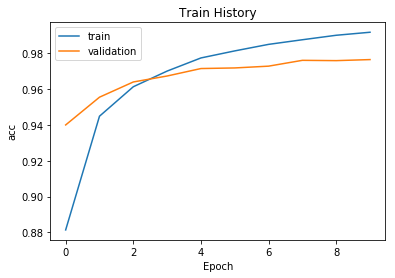

In [6]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
show_train_history(train_history,'acc','val_acc')

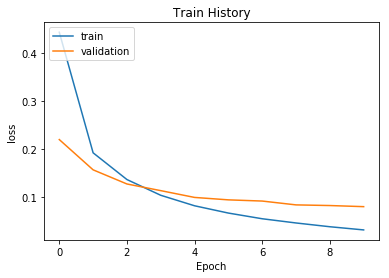

In [7]:
show_train_history(train_history,'loss','val_loss')


In [10]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 61us/step

accuracy= 0.9774


In [11]:
prediction = model.predict_classes(x_Test)

prediction

array([7, 2, 1, ..., 4, 5, 6])

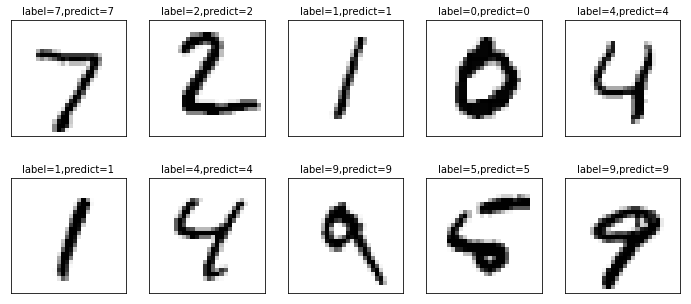

In [12]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()
    
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=0)

In [13]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1125,4,0,0,1,2,0,3,0
2,5,1,1011,0,1,0,2,5,6,1
3,0,0,4,994,0,1,0,3,4,4
4,1,0,5,1,960,0,3,0,2,10
5,3,0,0,15,1,856,6,1,7,3
6,6,3,1,1,4,3,939,0,1,0
7,0,5,12,7,1,0,0,990,4,9
8,3,0,3,5,2,1,2,2,955,1


In [14]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [15]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
4271,5,3
4355,5,3


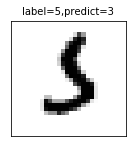

In [16]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

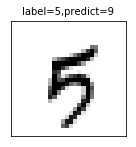

In [17]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)